Graficar y Analizar skills optimas basadas en alta demanda y salarios altos, tablas a comparar con trabajos remotos y presenciales

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from datasets import load_dataset

#loading data
dataset_presencial = pd.read_csv("csv/5_1_remote_query_optimal_skills.csv", sep=',')
dataset_remoto = pd.read_csv("csv/5_2_onsite_query_optimal_skills.csv", sep=',')

d:\Anaconda\envs\cursito\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#unificar datasets para graficar
df_onsite = dataset_presencial.copy()
df_onsite['work_mode'] = 'Onsite'
df_remoto = dataset_remoto.copy()
df_remoto['work_mode'] = 'Remote'

In [4]:
#primero hacemos el grafico con remoto
df_remoto_plot = (
    df_remoto
    .groupby('skills', as_index=False)
    .agg({
        'salary_avg': 'mean',
        'demand_count': 'sum'
    })
    .head(10)
    .sort_values('salary_avg', ascending=False)
)
df_remoto_plot = df_remoto_plot.reset_index(drop=True)


Grafico Skills Optimas Remoto

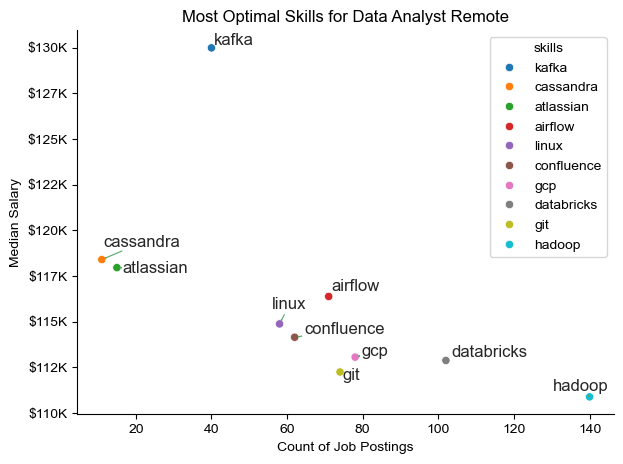

In [5]:
from matplotlib.patches import ArrowStyle
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.scatterplot(
    data=df_remoto_plot, 
    x='demand_count',
    y='salary_avg',
    hue='skills',
    palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

texts = []
for i, txt in enumerate(df_remoto_plot['skills']):
    texts.append(plt.text(df_remoto_plot['demand_count'].iloc[i], df_remoto_plot['salary_avg'].iloc[i], txt))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

#adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='g', lw=0.8))  

# set axis, label, title and legend
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary')
plt.title('Most Optimal Skills for Data Analyst Remote')
# adjust layout and display out
plt.tight_layout()
plt.show()

In [6]:
df_onsite_plot = (
    df_onsite
    .groupby('skills', as_index=False)
    .agg({
        'salary_avg': 'mean',
        'demand_count': 'sum'
    })
    .head(10)
    .sort_values('salary_avg', ascending=False)
)
df_onsite_plot = df_onsite_plot.reset_index(drop=True)

Grafico Skills Optimas Onsite

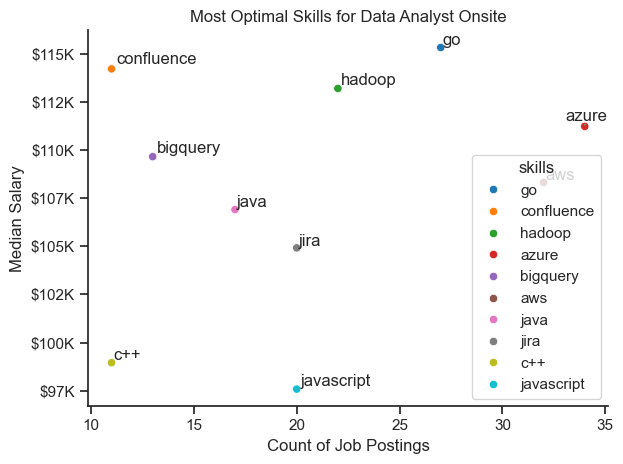

In [7]:
from matplotlib.patches import ArrowStyle
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.scatterplot(
    data=df_onsite_plot, 
    x='demand_count',
    y='salary_avg',
    hue='skills',
    palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

texts = []
for i, txt in enumerate(df_onsite_plot['skills']):
    texts.append(plt.text(df_onsite_plot['demand_count'].iloc[i], df_onsite_plot['salary_avg'].iloc[i], txt))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

#adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='g', lw=0.8))  

# set axis, label, title and legend
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary')
plt.title('Most Optimal Skills for Data Analyst Onsite')
# adjust layout and display out
plt.tight_layout()
plt.show()

Comparacion entre las dos Graficas

In [8]:
df_onsite_plot = df_onsite.head(10)
df_remoto_plot = df_remoto.head(10)
df_merged = pd.concat([df_remoto_plot, df_onsite_plot], ignore_index=True)
df_merged = df_merged.reset_index(drop=True)
df_merged

,skill_id,skills,demand_count,salary_avg,work_mode
0,98,kafka,40,129999,Remote
1,101,pytorch,20,125226,Remote
2,31,perl,20,124686,Remote
3,99,tensorflow,24,120647,Remote
4,63,cassandra,11,118407,Remote
5,219,atlassian,15,117966,Remote
6,96,airflow,71,116387,Remote
7,3,scala,59,115480,Remote
8,169,linux,58,114883,Remote
9,234,confluence,62,114153,Remote


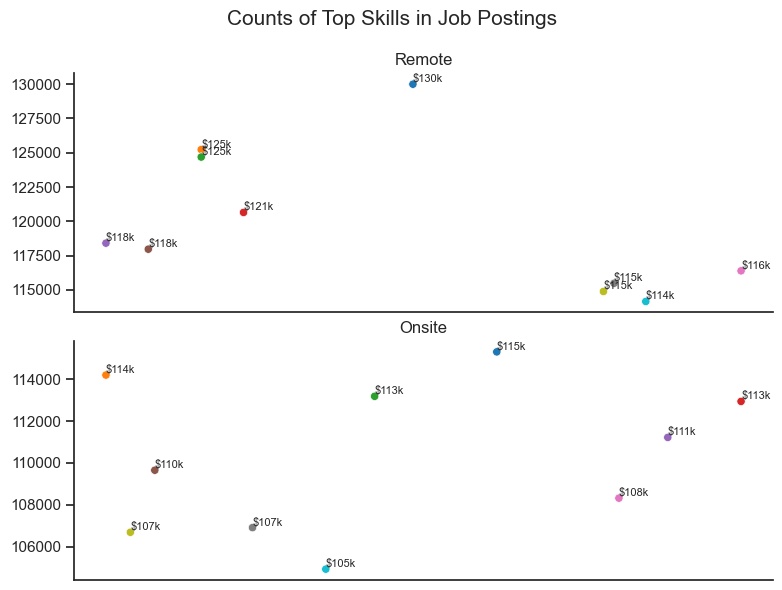

In [ ]:
work_modes = df_merged['work_mode'].unique()
fig, ax = plt.subplots(len(work_modes), 1, figsize=(8,6))

sns.set_theme(style='ticks')

for i, work_mode in enumerate(work_modes):
    df_plot = df_merged[df_merged['work_mode'] == work_mode].head(10)
    sns.scatterplot(
        data=df_plot, 
        x='demand_count',
        y='salary_avg',
        hue='skills',
        palette='tab10',
        ax=ax[i])
    ax[i].set_title(work_mode)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    
    for _, row in df_plot.iterrows():
        ax[i].text(
            row['demand_count'],
            row['salary_avg'],
            row['skills'],
            fontsize=8,
            ha='left',
            va='bottom'
        )
    
    if i != len(work_mode) - 1:    
        ax[i].set_xticks([])

sns.despine()
    
fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) #fix the overlap
plt.show()